# COVID-19 Reinfection Health Data - Exploratory Data Analysis (EDA)

his dataset captures comprehensive information about patients affected by COVID-19 and related health conditions, covering demographics such as age, gender, region, occupation, smoking status, and BMI; medical history including preexisting conditions like hypertension, asthma, obesity, and cardiovascular disease; and detailed COVID-19 records such as date of infection, strain type, symptoms, severity, hospitalization, ICU admission, ventilator support, and recovery outcomes. It also includes vaccination details like vaccination status, vaccine type, doses received, and last dose date, along with reinfection cases and long-COVID symptoms. The objective of this analysis is to explore patterns, trends, and correlations that affect COVID-19 outcomes, including the impact of demographics, preexisting conditions, and vaccination on severity and hospitalization, as well as regional differences and reinfection patterns. Through systematic exploratory data analysis (EDA), we will examine the dataset’s structure, summarize key features, identify risk factors, detect anomalies or outliers, and highlight actionable insights that can inform healthcare decisions and public health strategies.

In [36]:
# remove the warning message
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [37]:
import pandas as pd
df = pd.read_csv("C:\Data_science\Data_set\covid_related_disease_data.csv")


Display the first 5 rows of the data set

In [38]:
print(df.head())

   Patient_ID  Age  Gender       Region Preexisting_Condition  \
0           1   69    Male  Hovedstaden               Obesity   
1           2   38    Male     Sjælland                Asthma   
2           3   41  Female   Syddanmark          Hypertension   
3           4   81  Female  Hovedstaden                Asthma   
4           5   50  Female   Syddanmark        Cardiovascular   

  Date_of_Infection COVID_Strain Symptoms  Severity Hospitalized  ...  \
0        2022-06-21        Delta     Mild  Moderate          Yes  ...   
1        2024-02-02      XBB.1.5     Mild  Moderate           No  ...   
2        2023-05-28         Beta     Mild      High          Yes  ...   
3        2023-08-13        Delta   Severe      High           No  ...   
4        2023-03-10        Delta     Mild      High           No  ...   

  Reinfection Date_of_Reinfection Vaccination_Status Vaccine_Type  \
0          No                 NaN                Yes         None   
1          No                 Na

Display the last 5 rows of the dataset

In [39]:
print(df.tail())

      Patient_ID  Age  Gender       Region Preexisting_Condition  \
2995        2996   43    Male  Nordjylland          Hypertension   
2996        2997   36  Female   Syddanmark               Obesity   
2997        2998   75  Female     Sjælland        Cardiovascular   
2998        2999   45  Female  Hovedstaden                Asthma   
2999        3000   83  Female  Midtjylland               Obesity   

     Date_of_Infection COVID_Strain  Symptoms  Severity Hospitalized  ...  \
2995        2022-10-19      XBB.1.5    Severe  Critical           No  ...   
2996        2022-12-16      Omicron  Moderate       Low           No  ...   
2997        2023-09-30         Beta    Severe  Moderate           No  ...   
2998        2023-06-06        Delta    Severe  Moderate           No  ...   
2999        2023-09-07      XBB.1.5  Moderate       Low           No  ...   

     Reinfection Date_of_Reinfection Vaccination_Status Vaccine_Type  \
2995          No                 NaN                Yes 

Data cleaning

In [40]:
print(df.isna().sum())

Patient_ID                    0
Age                           0
Gender                        0
Region                        0
Preexisting_Condition         0
Date_of_Infection             0
COVID_Strain                  0
Symptoms                      0
Severity                      0
Hospitalized                  0
Hospital_Admission_Date    2124
Hospital_Discharge_Date    2124
ICU_Admission                 0
Ventilator_Support            0
Recovered                     0
Date_of_Recovery           1492
Reinfection                   0
Date_of_Reinfection        2715
Vaccination_Status            0
Vaccine_Type                  0
Doses_Received                0
Date_of_Last_Dose          1528
Long_COVID_Symptoms           0
Occupation                    0
Smoking_Status                0
BMI                           0
dtype: int64


In [41]:
# Remove spaces from column names
df.columns = df.columns.str.replace(' ','_')

In [42]:
# Check for duplicate rows
df.duplicated().sum()

0

Data Understanding

In [43]:
 # Basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               3000 non-null   int64  
 1   Age                      3000 non-null   int64  
 2   Gender                   3000 non-null   object 
 3   Region                   3000 non-null   object 
 4   Preexisting_Condition    3000 non-null   object 
 5   Date_of_Infection        3000 non-null   object 
 6   COVID_Strain             3000 non-null   object 
 7   Symptoms                 3000 non-null   object 
 8   Severity                 3000 non-null   object 
 9   Hospitalized             3000 non-null   object 
 10  Hospital_Admission_Date  876 non-null    object 
 11  Hospital_Discharge_Date  876 non-null    object 
 12  ICU_Admission            3000 non-null   object 
 13  Ventilator_Support       3000 non-null   object 
 14  Recovered               

In [44]:
print(df.describe())

        Patient_ID          Age  Doses_Received          BMI
count  3000.000000  3000.000000     3000.000000  3000.000000
mean   1500.500000    53.944000        0.981667    25.096500
std     866.169729    20.872919        1.154025     4.898435
min       1.000000    18.000000        0.000000    10.200000
25%     750.750000    36.000000        0.000000    21.800000
50%    1500.500000    54.000000        0.000000    25.100000
75%    2250.250000    72.000000        2.000000    28.500000
max    3000.000000    89.000000        3.000000    44.600000


### 1. How many unique patients are there, and how many records per region?

In [45]:
#  Unique patient count
print("Unique Patients:", df['Patient_ID'].nunique())

# Number of records per region
print(df['Region'].value_counts())


Unique Patients: 3000
Midtjylland    628
Hovedstaden    612
Sjælland       609
Syddanmark     597
Nordjylland    554
Name: Region, dtype: int64


### 2. What is the average age for each severity level?

In [46]:
# Average Age for each Severity level
print(df.groupby('Severity')['Age'].mean())


Severity
Critical    53.295359
High        54.110966
Low         53.521858
Moderate    54.756005
Name: Age, dtype: float64


### 3. Which preexisting conditions are most common, and how many patients had them?

Cardiovascular    533
Obesity           511
Diabetes          511
Hypertension      493
Asthma            483
None              469
Name: Preexisting_Condition, dtype: int64


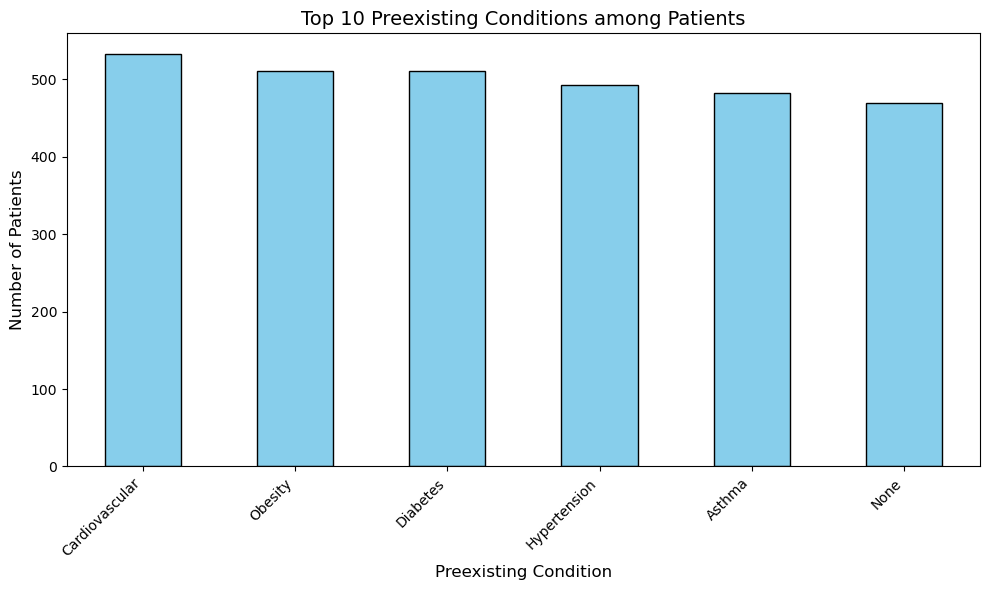

In [47]:
# Count most common preexisting conditions
condition_counts = df['Preexisting_Condition'].value_counts()

# Print top 10 conditions
print(condition_counts.head(10))

# Plot top 10
plt.figure(figsize=(10,6))
condition_counts.head(10).plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Top 10 Preexisting Conditions among Patients", fontsize=14)
plt.xlabel("Preexisting Condition", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 4. What is the gender distribution of patients?

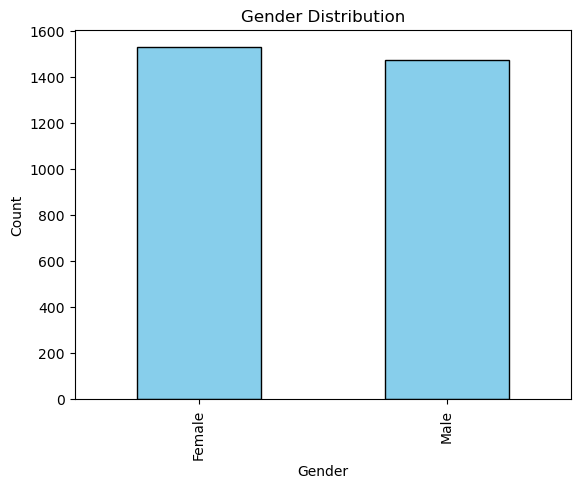

In [48]:
df['Gender'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


### 5. How many patients were hospitalized vs. not hospitalized?

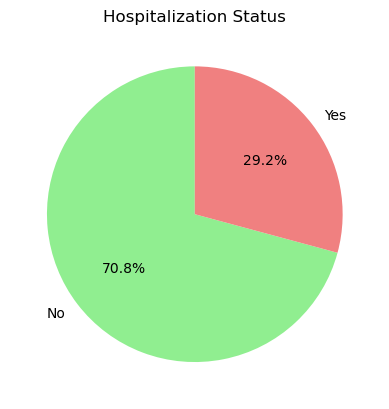

In [49]:
df['Hospitalized'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen','lightcoral'])
plt.title("Hospitalization Status")
plt.ylabel("")
plt.show()


### 6. What is the distribution of COVID strains?

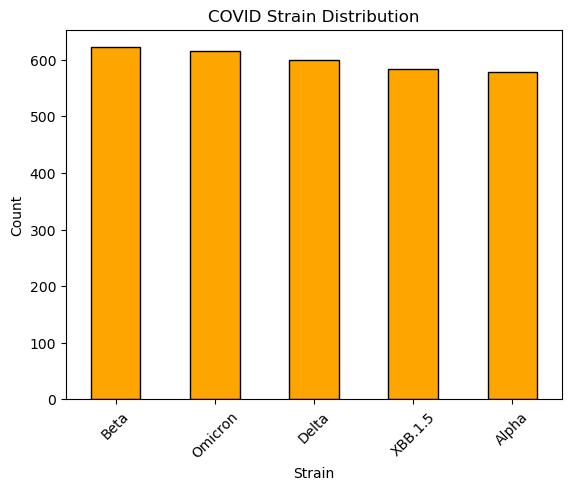

In [50]:
df['COVID_Strain'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title("COVID Strain Distribution")
plt.xlabel("Strain")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### 7. Does vaccination status affect hospitalization rate?

In [51]:
pd.crosstab(df['Vaccination_Status'], df['Hospitalized'])


Hospitalized,No,Yes
Vaccination_Status,,
No,1088,440
Yes,1036,436


### 8. What is the average BMI across severity categories?

In [52]:
df.groupby('Severity')['BMI'].mean()


Severity
Critical    25.113502
High        25.239817
Low         25.327186
Moderate    24.728951
Name: BMI, dtype: float64

### 9. Which occupations have the highest infection counts?

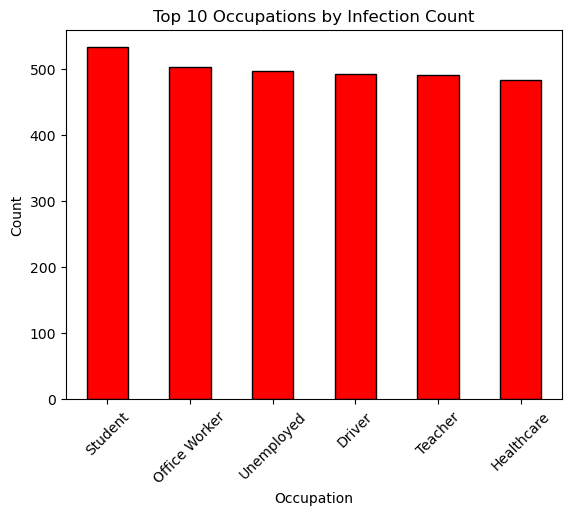

In [53]:
df['Occupation'].value_counts().head(10).plot(kind='bar', color='red', edgecolor='black')
plt.title("Top 10 Occupations by Infection Count")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### 10. How do reinfection cases trend over time?

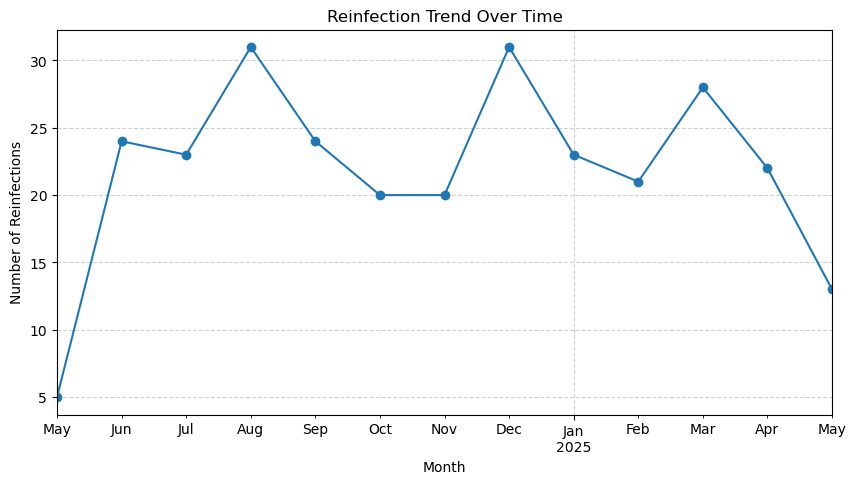

In [54]:
df['Date_of_Reinfection'] = pd.to_datetime(df['Date_of_Reinfection'], errors='coerce')
reinfection_trend = df[df['Reinfection']=='Yes'].groupby(df['Date_of_Reinfection'].dt.to_period('M')).size()
reinfection_trend.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Reinfection Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Reinfections")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### 11. Which vaccine type was most administered, and with how many doses?

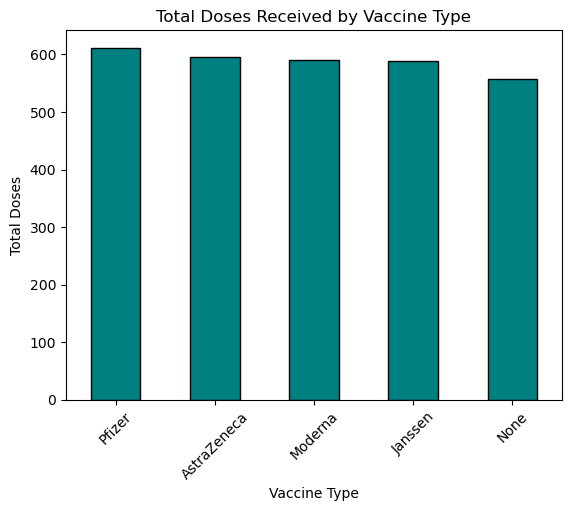

In [55]:
df.groupby('Vaccine_Type')['Doses_Received'].sum().sort_values(ascending=False).plot(kind='bar', color='teal', edgecolor='black')
plt.title("Total Doses Received by Vaccine Type")
plt.xlabel("Vaccine Type")
plt.ylabel("Total Doses")
plt.xticks(rotation=45)
plt.show()


### 12. What is the distribution of patient ages?

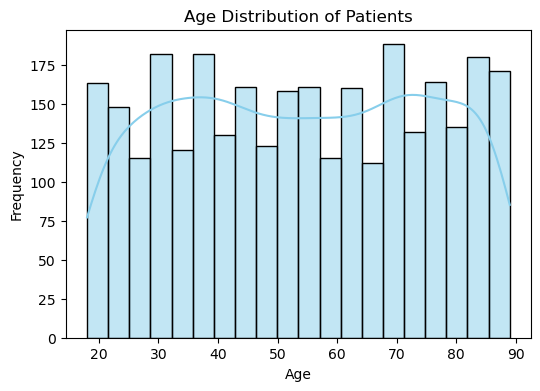

In [56]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


### 12. Is there a relationship between Age and BMI of patients?

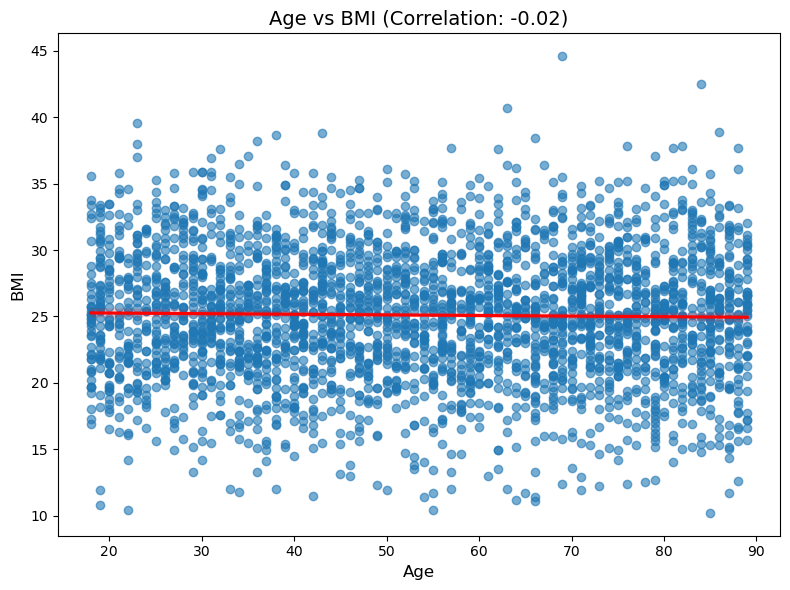

In [57]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='Age', y='BMI', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

corr_val = df['Age'].corr(df['BMI'])
plt.title(f"Age vs BMI (Correlation: {corr_val:.2f})", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("BMI", fontsize=12)
plt.tight_layout()
plt.show()


### 13. How does hospitalization status vary by vaccination status?

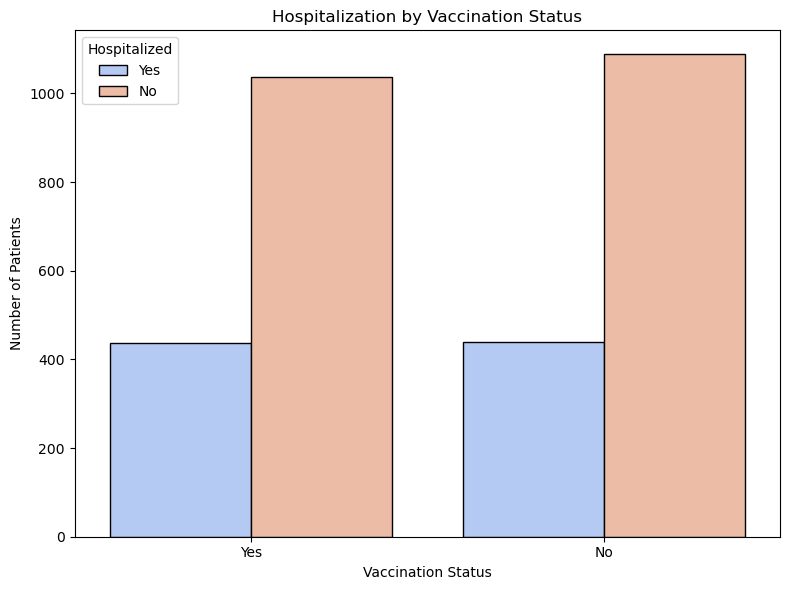

In [58]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Vaccination_Status', hue='Hospitalized', palette='coolwarm', edgecolor='black')

plt.title("Hospitalization by Vaccination Status")
plt.xlabel("Vaccination Status")
plt.ylabel("Number of Patients")
plt.legend(title="Hospitalized")
plt.tight_layout()
plt.show()


### 14. How many infections occurred each month?

In [59]:
# Convert Date_of_Infection to datetime
df['Date_of_Infection'] = pd.to_datetime(df['Date_of_Infection'], errors='coerce')

# Group by month
infections_per_month = df.groupby(df['Date_of_Infection'].dt.to_period('M')).size()

print("Infections per month:")
print(infections_per_month)


Infections per month:
Date_of_Infection
2022-05     35
2022-06    117
2022-07    108
2022-08    118
2022-09    121
2022-10    128
2022-11    117
2022-12    140
2023-01    106
2023-02    125
2023-03    131
2023-04    133
2023-05    134
2023-06    132
2023-07    136
2023-08    123
2023-09    135
2023-10    129
2023-11    117
2023-12    129
2024-01    133
2024-02    130
2024-03    119
2024-04    119
2024-05     85
Freq: M, dtype: int64


### 15.Which regions reported the highest number of severe cases?

In [60]:
# Count severe cases by Region
severe_cases = df[df['Severity'] == 'Severe']['Region'].value_counts()

print("Severe cases by Region:")
print(severe_cases)


Severe cases by Region:
Series([], Name: Region, dtype: int64)


### 16.What is the trend of infections over time (monthly)?

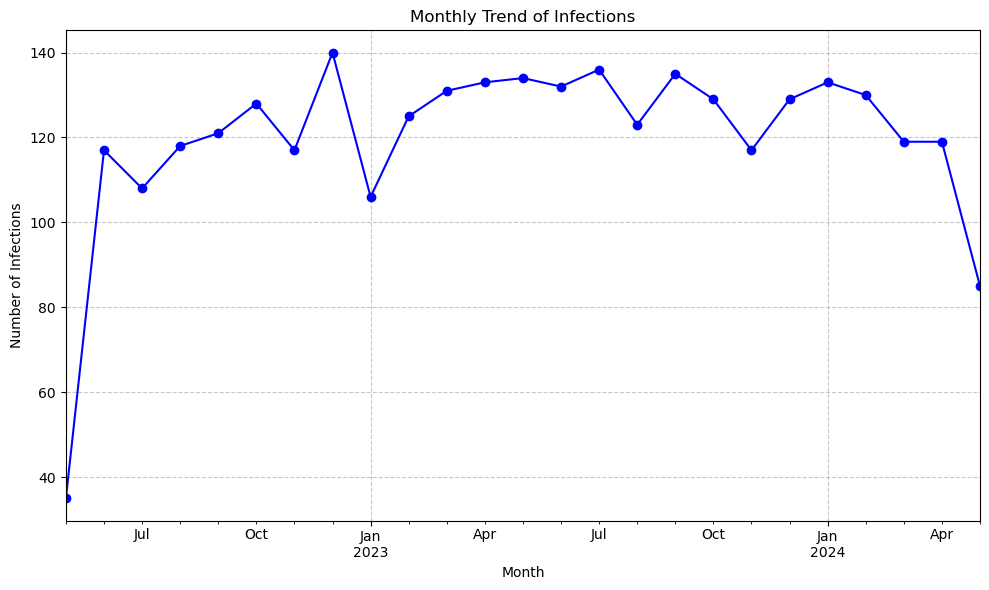

In [61]:
# Ensure Date_of_Infection is datetime
df['Date_of_Infection'] = pd.to_datetime(df['Date_of_Infection'], errors='coerce')

# Group by month
monthly_infections = df.groupby(df['Date_of_Infection'].dt.to_period('M')).size()

# Plot line chart
plt.figure(figsize=(10,6))
monthly_infections.plot(kind='line', marker='o', color='blue')

plt.title("Monthly Trend of Infections")
plt.xlabel("Month")
plt.ylabel("Number of Infections")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 17.Which factors (Age, BMI, Vaccination, Preexisting Conditions) influence Severity the most?

In [62]:
# Average Age and BMI by Severity
print("Average Age by Severity:")
print(df.groupby('Severity')['Age'].mean(), "\n")

print("Average BMI by Severity:")
print(df.groupby('Severity')['BMI'].mean(), "\n")

# Vaccination Status distribution within Severity
print("Vaccination Status by Severity:")
print(pd.crosstab(df['Severity'], df['Vaccination_Status']), "\n")

# Most common preexisting conditions by Severity
print("Top Preexisting Conditions by Severity:")
print(df.groupby('Severity')['Preexisting_Condition'].value_counts().groupby(level=0).head(3))


Average Age by Severity:
Severity
Critical    53.295359
High        54.110966
Low         53.521858
Moderate    54.756005
Name: Age, dtype: float64 

Average BMI by Severity:
Severity
Critical    25.113502
High        25.239817
Low         25.327186
Moderate    24.728951
Name: BMI, dtype: float64 

Vaccination Status by Severity:
Vaccination_Status   No  Yes
Severity                    
Critical            373  338
High                374  392
Low                 377  355
Moderate            404  387 

Top Preexisting Conditions by Severity:
Severity  Preexisting_Condition
Critical  Hypertension             137
          Cardiovascular           127
          Obesity                  116
High      Diabetes                 139
          Hypertension             134
          Obesity                  132
Low       Cardiovascular           138
          Obesity                  131
          None                     125
Moderate  Cardiovascular           142
          Diabetes            

### 18.What is the correlation among numerical features in the COVID dataset?

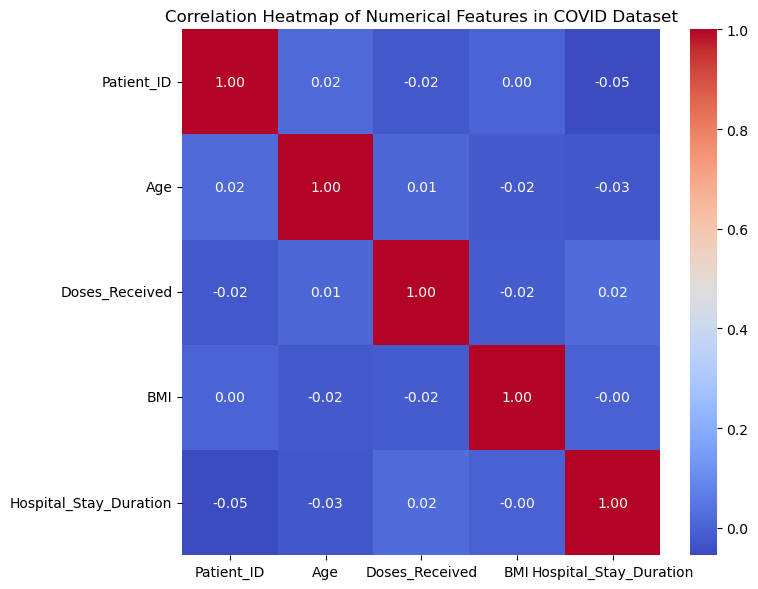

In [63]:
# Derive Hospital Stay Duration (if not already present)
df['Hospital_Admission_Date'] = pd.to_datetime(df['Hospital_Admission_Date'], errors='coerce')
df['Hospital_Discharge_Date'] = pd.to_datetime(df['Hospital_Discharge_Date'], errors='coerce')
df['Hospital_Stay_Duration'] = (df['Hospital_Discharge_Date'] - df['Hospital_Admission_Date']).dt.days

# Select numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation
corr = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Numerical Features in COVID Dataset")
plt.tight_layout()
plt.show()


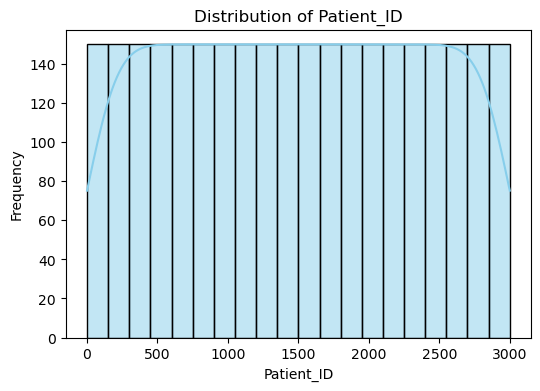

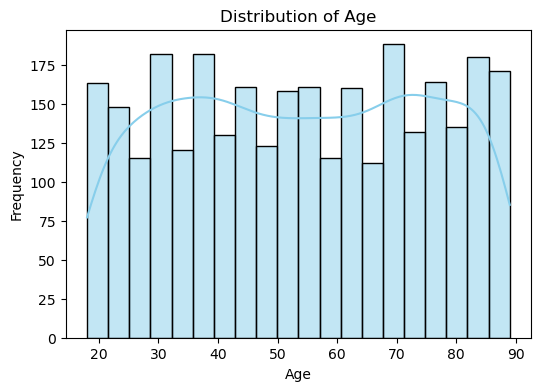

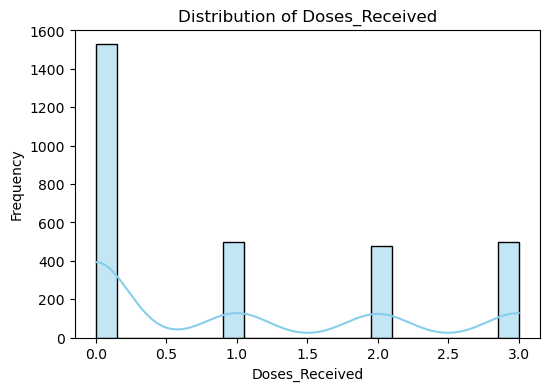

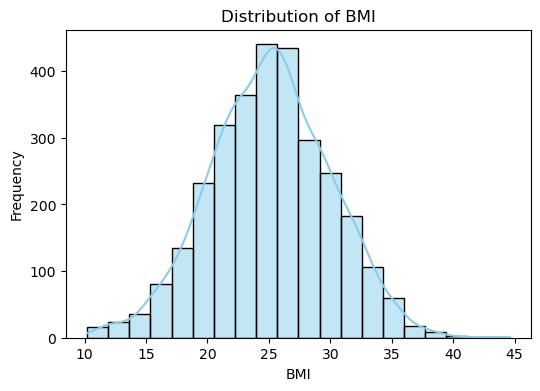

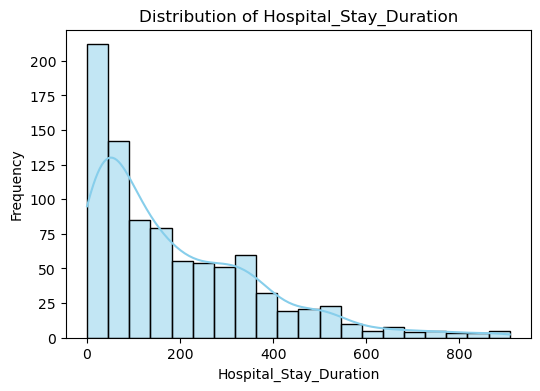

In [64]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histogram for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), bins=20, kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


### How does COVID severity vary by gender?

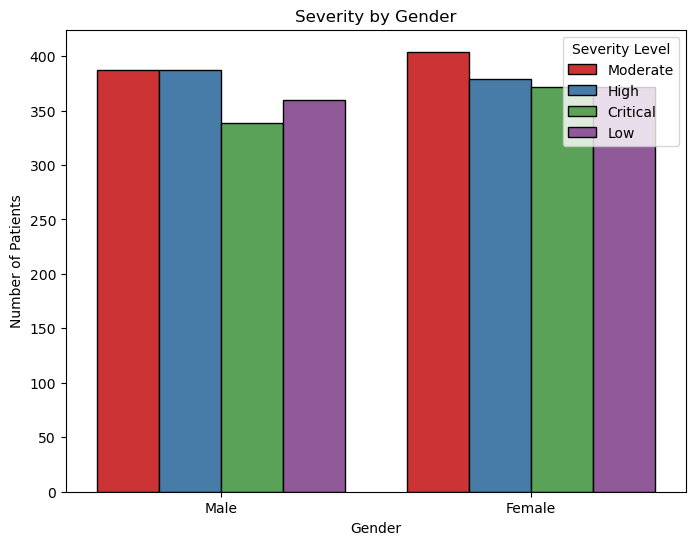

In [65]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Gender', hue='Severity', palette='Set1', edgecolor='black')

plt.title("Severity by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.legend(title="Severity Level")
plt.show()


### Outlier Detection

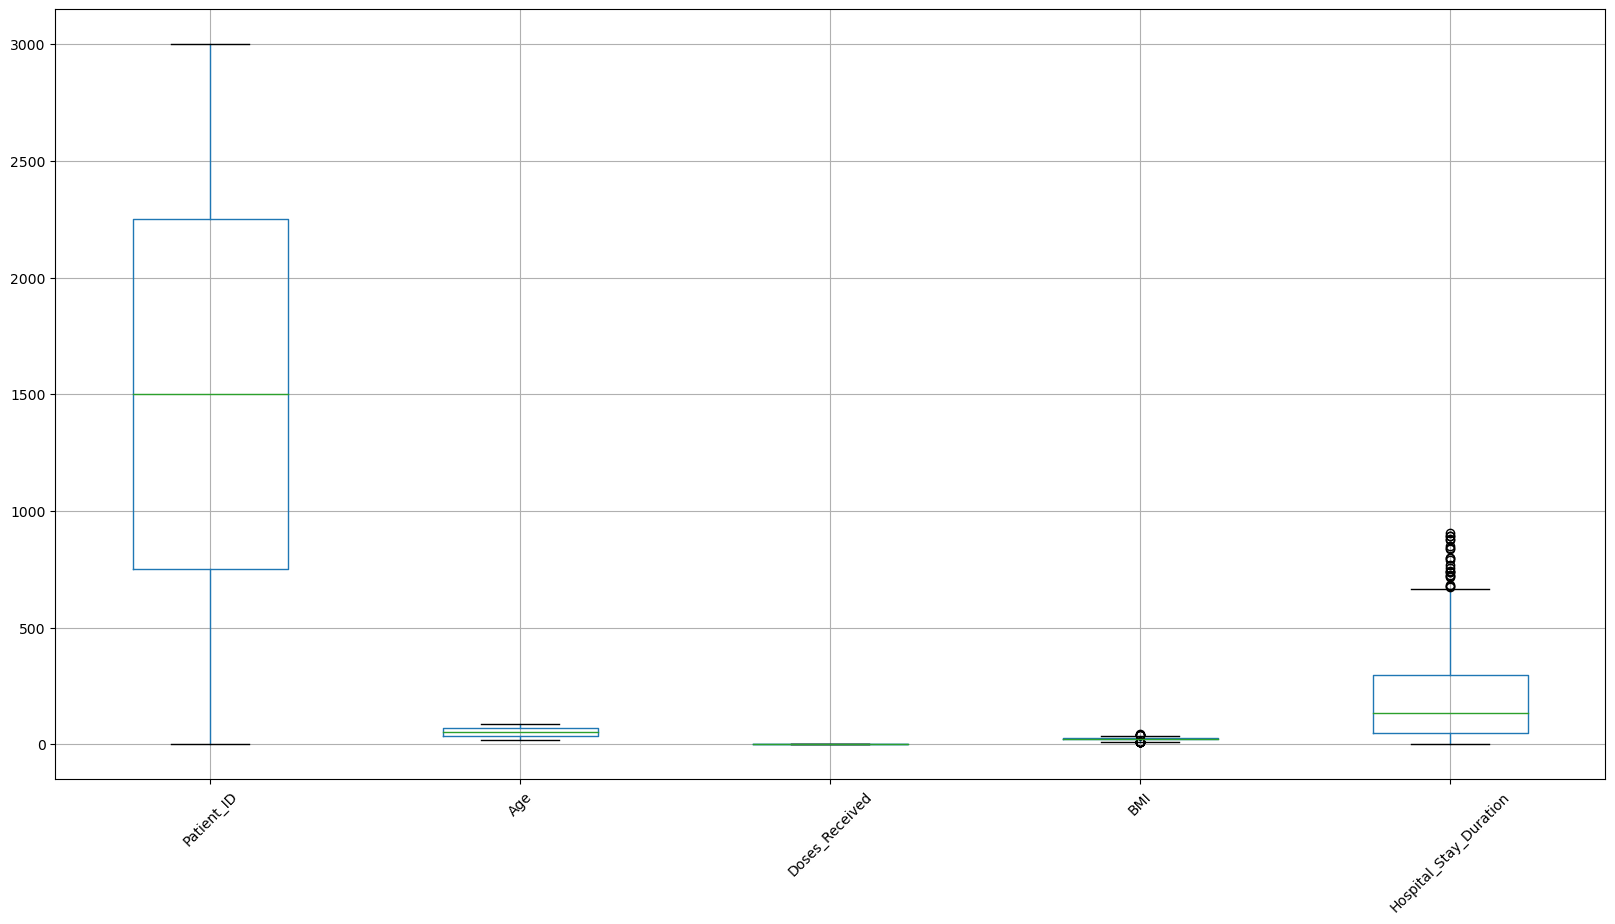

In [66]:
 #plot boxplot for checking outliers
df.boxplot(figsize=(20,10))
plt.xticks(rotation=45)
plt.show()

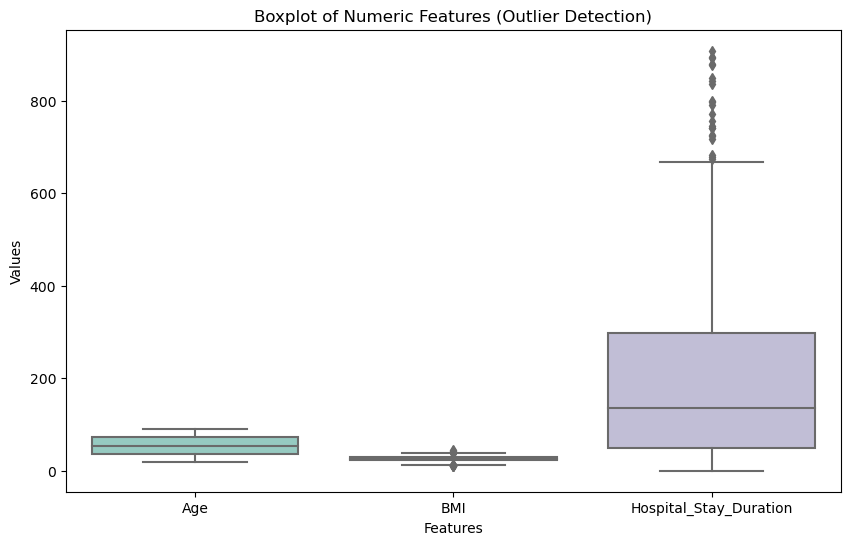

In [67]:
# Are there outliers in numerical features (Age, BMI, Hospital Stay Duration)

# Make sure Hospital Stay Duration is available
df['Hospital_Admission_Date'] = pd.to_datetime(df['Hospital_Admission_Date'], errors='coerce')
df['Hospital_Discharge_Date'] = pd.to_datetime(df['Hospital_Discharge_Date'], errors='coerce')
df['Hospital_Stay_Duration'] = (df['Hospital_Discharge_Date'] - df['Hospital_Admission_Date']).dt.days

# Select numeric columns
numeric_cols = ['Age', 'BMI', 'Hospital_Stay_Duration']

# Plot boxplots
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numeric_cols], palette='Set3')
plt.title("Boxplot of Numeric Features (Outlier Detection)")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()


### Feature Engineering

In [68]:

# 1. Hospital Stay Duration
df['Hospital_Admission_Date'] = pd.to_datetime(df['Hospital_Admission_Date'], errors='coerce')
df['Hospital_Discharge_Date'] = pd.to_datetime(df['Hospital_Discharge_Date'], errors='coerce')
df['Hospital_Stay_Duration'] = (df['Hospital_Discharge_Date'] - df['Hospital_Admission_Date']).dt.days

# 2. Infection date transformations
df['Date_of_Infection'] = pd.to_datetime(df['Date_of_Infection'], errors='coerce')
df['Infection_Year'] = df['Date_of_Infection'].dt.year
df['Infection_Month'] = df['Date_of_Infection'].dt.month
df['Infection_Weekday'] = df['Date_of_Infection'].dt.day_name()

# 3. Vaccination flag
df['Vaccinated_Flag'] = df['Vaccination_Status'].apply(lambda x: 1 if x == 'Vaccinated' else 0)

# 4. Encode Severity levels
severity_map = {'Mild': 1, 'Moderate': 2, 'Severe': 3}
df['Severity_Encoded'] = df['Severity'].map(severity_map)

# 5. Age Groups
def age_group(age):
    if age < 18: 
        return 'Child'
    elif age < 40: 
        return 'Young Adult'
    elif age < 60: 
        return 'Middle Age'
    else: 
        return 'Senior'

df['Age_Group'] = df['Age'].apply(age_group)

# Show first few rows with new features
df.head()


,Patient_ID,Age,Gender,Region,Preexisting_Condition,Date_of_Infection,COVID_Strain,Symptoms,Severity,Hospitalized,...,Occupation,Smoking_Status,BMI,Hospital_Stay_Duration,Infection_Year,Infection_Month,Infection_Weekday,Vaccinated_Flag,Severity_Encoded,Age_Group
0,1,69,Male,Hovedstaden,Obesity,2022-06-21,Delta,Mild,Moderate,Yes,...,Healthcare,Never,27.7,13.0,2022,6,Tuesday,0,2.0,Senior
1,2,38,Male,Sjælland,Asthma,2024-02-02,XBB.1.5,Mild,Moderate,No,...,Healthcare,Never,21.9,NaN,2024,2,Friday,0,2.0,Young Adult
2,3,41,Female,Syddanmark,Hypertension,2023-05-28,Beta,Mild,High,Yes,...,Unemployed,Never,22.7,50.0,2023,5,Sunday,0,NaN,Middle Age
3,4,81,Female,Hovedstaden,Asthma,2023-08-13,Delta,Severe,High,No,...,Office Worker,Never,27.7,NaN,2023,8,Sunday,0,NaN,Senior
4,5,50,Female,Syddanmark,Cardiovascular,2023-03-10,Delta,Mild,High,No,...,Student,Never,11.9,NaN,2023,3,Friday,0,NaN,Middle Age


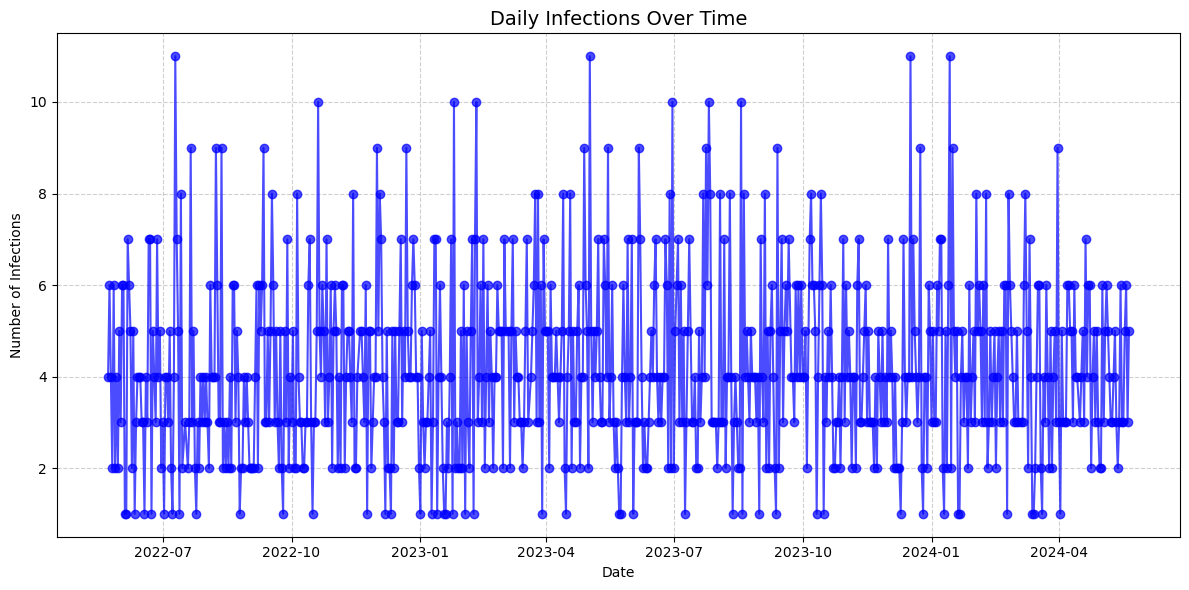

In [69]:
# Ensure Date_of_Infection is datetime
df['Date_of_Infection'] = pd.to_datetime(df['Date_of_Infection'], errors='coerce')

# Group infections by date
daily_infections = df.groupby('Date_of_Infection').size()

# Plot infections over time (line + scatter points)
plt.figure(figsize=(12,6))
plt.plot(daily_infections.index, daily_infections.values, marker='o', linestyle='-', color='blue', alpha=0.7)

plt.title("Daily Infections Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of Infections")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


### Suggestions and Recommendations


1. Strengthen Preventive Healthcare

Observation: Higher severity levels are linked with patients having preexisting conditions and higher BMI.
Recommendation:

Promote early screening for high-risk groups.

Run awareness campaigns on lifestyle and preventive health.

Encourage routine checkups for patients with comorbidities.

2. Improve Vaccination Coverage

Observation: Hospitalization and severity are higher among unvaccinated patients.
Recommendation:

Continue vaccination drives, focusing on low-coverage regions.

Provide incentives for vaccination (subsidies, insurance benefits).

Strengthen booster dose campaigns for vulnerable populations.

3. Optimize Hospital Resource Allocation

Observation: Hospital stay duration varies widely across patients and regions.
Recommendation:

Use data-driven forecasting to allocate beds, staff, and equipment.

Develop regional COVID care centers to reduce overload in specific hospitals.

Implement telemedicine follow-ups to shorten hospital stays safely.

4. Focus on Regional Risk Management

Observation: Certain regions reported higher numbers of severe cases.
Recommendation:

Deploy targeted healthcare resources to high-risk regions.

Strengthen local testing, isolation, and treatment facilities.

Establish mobile healthcare units in rural/remote areas.

5. Enhance Data-Driven Policy Making

Observation: Trends in infections show periodic spikes, and correlations exist among Age, BMI, and Severity.
Recommendation:

Build predictive models using this data to prepare for future waves.

Share insights with public health policymakers for preventive action.

Encourage open-data collaboration for pandemic research.